In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Load the dataset
file_path = "New Crop 50K.csv"
farm = pd.read_csv(file_path)
farm.sample(15)


,N,P,K,temperature,humidity,ph,rainfall,label
27173,57.86,37,115,24.643055,68.762363,6.531751,8.17,cotton
37290,79.29,44,153,33.062526,79.011549,4.520128,9.07,rice
29708,77.14,123,99,40.008783,64.075162,6.861095,12.26,banana
32844,86.43,110,175,20.596297,82.297521,6.416537,10.44,sugarcane
31780,13.57,22,71,22.136333,12.226109,6.022140,0.95,wheat
22454,22.86,37,43,27.714098,80.975275,5.611015,1.57,millet
48143,62.14,68,170,43.643647,80.466099,8.687944,4.71,banana
3320,41.43,50,93,44.156466,88.725791,5.260218,2.28,coffee
25175,86.43,124,154,34.298585,75.946400,6.440993,8.63,rice
44769,12.86,90,27,29.634099,54.613908,5.304573,6.14,coffee


In [22]:
# Display basic dataset information
print("Dataset Info:\n", farm.info())
print("\nFirst 5 Rows:\n", farm.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            50000 non-null  float64
 1   P            50000 non-null  int64  
 2   K            50000 non-null  int64  
 3   temperature  50000 non-null  float64
 4   humidity     50000 non-null  float64
 5   ph           50000 non-null  float64
 6   rainfall     50000 non-null  float64
 7   label        50000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 3.1+ MB
Dataset Info:
 None

First 5 Rows:
        N    P    K  temperature   humidity        ph  rainfall      label
0  87.86    6   36    31.160854  73.254164  8.371057      1.88     banana
1  50.00  103  138    19.713716  46.572311  7.254831      2.28      wheat
2  76.43  115  186    43.453928  44.732484  8.900949      6.40  sugarcane
3  70.71   38   60    32.577117  19.010997  5.216870      2.95     coffee
4  3

In [23]:
# Check for missing values
print("\nMissing Values:\n", farm.isnull().sum())




Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [24]:
# Summary statistics
desc_stats = farm.describe()
print("\nSummary Statistics:\n", desc_stats)
desc_stats.to_csv("descriptive_statistics.csv")





Summary Statistics:
                   N             P            K   temperature      humidity  \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean      49.642576     74.881220    104.60452     27.460445     49.948560   
std       28.957839     40.329283     57.78150     10.113574     23.104379   
min        0.000000      5.000000      5.00000     10.000506     10.002027   
25%       24.290000     40.000000     55.00000     18.702389     29.914254   
50%       49.645000     75.000000    104.00000     27.408532     49.990220   
75%       75.000000    110.000000    155.00000     36.191366     70.036294   
max       99.290000    144.000000    204.00000     44.999820     89.995762   

                 ph      rainfall  
count  50000.000000  50000.000000  
mean       6.261625      6.649578  
std        1.577444      3.351712  
min        3.500124      0.830000  
25%        4.904280      3.750000  
50%        6.272278      6.650000  
75%        7.620060    

In [25]:
farm.label.value_counts()

label
wheat        12055
millet        8591
coffee        6969
banana        5925
rice          5249
sugarcane     2761
cotton        1290
soybean       1222
groundnut     1218
maize         1213
tea           1193
pulses        1167
barley        1147
Name: count, dtype: int64

In [26]:
# Set Seaborn style
sns.set_style("whitegrid")



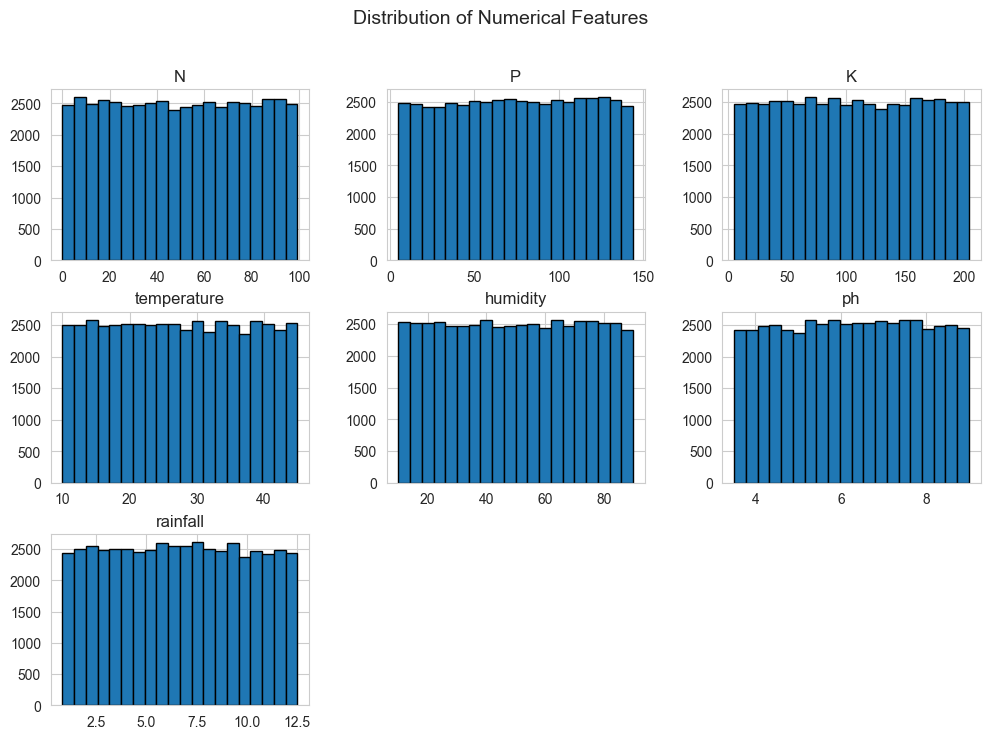

In [27]:
# --- Visualization ---

# 1. Distribution of each numerical column
farm.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()



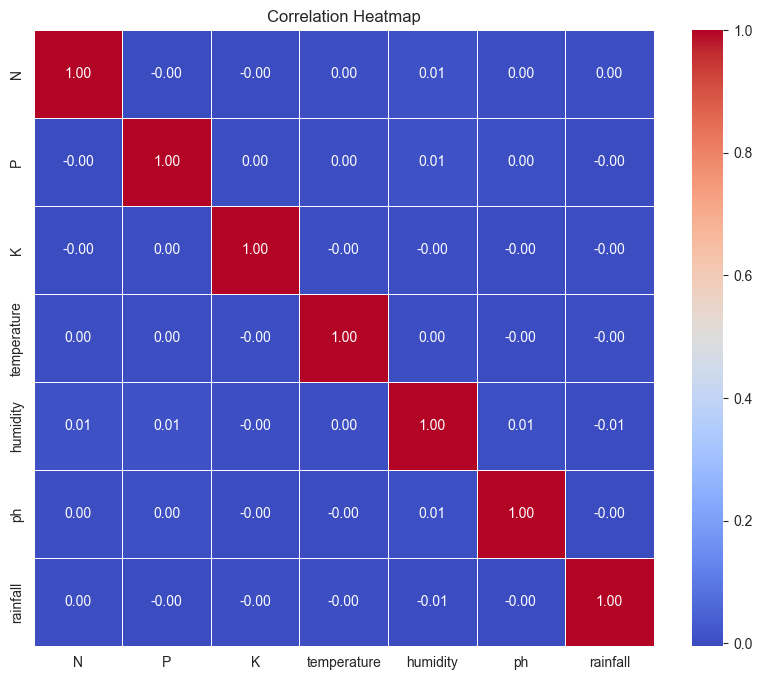

In [28]:
# 2. Correlation heatmap
# Remove non-numeric columns for correlation analysis
numeric_df = farm.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Pairplot to visualize relationships
sns.pairplot(farm, hue='label', diag_kind='kde')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 5), loc='upper left')
plt.show()


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=farm.drop(columns=['label']))
plt.xticks(rotation=45)
plt.title('Nutrient Distribution Boxplot')
plt.show()

In [ ]:
# Countplot of different crop labels
plt.figure(figsize=(12, 6))
sns.countplot(y=farm['label'], order=farm['label'].value_counts().index, palette='viridis')
plt.title('Crop Distribution')
plt.xlabel('Count')
plt.ylabel('Crop Type')

plt.show()



In [ ]:
# Scatter plot of key nutrient relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['N'], y=farm['P'], hue=farm['label'], palette='deep')
plt.title('Nitrogen vs Phosphorus')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['K'], y=farm['ph'], hue=farm['label'], palette='coolwarm')
plt.title('Potassium vs pH')
plt.xlabel('Potassium')
plt.ylabel('pH Level')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Scatter plot of Temperature vs Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['temperature'], y=farm['humidity'], hue=farm['label'], palette='coolwarm')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Scatter plot of Temperature vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['temperature'], y=farm['rainfall'], hue=farm['label'], palette='viridis')
plt.title('Temperature vs Rainfall')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Scatter plot of Humidity vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x=farm['humidity'], y=farm['rainfall'], hue=farm['label'], palette='plasma')
plt.title('Humidity vs Rainfall')
plt.xlabel('Humidity (%)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Bar plot comparing average temperature, humidity, and rainfall by crop label
avg_values = farm.groupby('label')[['temperature', 'humidity', 'rainfall']].mean().reset_index()
plt.figure(figsize=(12, 6))
melted_avg = avg_values.melt(id_vars='label', var_name='Factor', value_name='Value')
sns.barplot(x='label', y='Value', hue='Factor', data=melted_avg, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Comparison of Temperature, Humidity, and Rainfall by Crop')
plt.xlabel('Crop Label')
plt.ylabel('Average Value')
plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Boxplot to compare temperature distribution among different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='temperature', data=farm, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Temperature Distribution Across Different Crops')
plt.xlabel('Crop Label')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
# Boxplot to compare humidity distribution among different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='humidity', data=farm, palette='viridis')
plt.xticks(rotation=90)
plt.title('Humidity Distribution Across Different Crops')
plt.xlabel('Crop Label')
plt.ylabel('Humidity (%)')
plt.show()

In [ ]:
# Boxplot to compare rainfall distribution among different crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='rainfall', data=farm, palette='plasma')
plt.xticks(rotation=90)
plt.title('Rainfall Distribution Across Different Crops')
plt.xlabel('Crop Label')
plt.ylabel('Rainfall (mm)')
plt.show()

In [ ]:
from platform import python_version

print(python_version())